

## Redunção da dimensionalidade (PCA)

Carregando a biblioteca de espécies de flores


In [1]:
#carregando a biblioteca python de acesso ao google drive
from google.colab import drive

#montando o drive
drive.mount('/content/drive')

#importando o pacote pandas
import pandas as pd

#lendo o arquivo iris.csv do google drive, dentro do diretório Data.
df = pd.read_csv('/content/drive/MyDrive/Data/iris.csv')

#acessando as primeiras 5 linhas do dataframe
df.head()

Mounted at /content/drive


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Normalizar os dados antes de aplicar o PCA

In [2]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Armazenando apenas os valores das features em x
x = df.loc[:, features].values

# Separando o label das classes
y = df.loc[:,['target']].values

# Normalizando as features
x = StandardScaler().fit_transform(x)

pd.DataFrame(x)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


Aplicando o PCA nos dados e extraindo 3 componentes.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2', 'PCA3'])

principalDf

,PCA1,PCA2,PCA3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
...,...,...,...
145,1.870522,0.382822,0.254532
146,1.558492,-0.905314,-0.025382
147,1.520845,0.266795,0.179277
148,1.376391,1.016362,0.931405


Percentual da variância dos dados explicados por cada PCA.

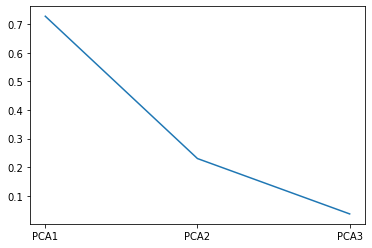

In [4]:
import matplotlib.pyplot as plt

plt.plot(['PCA1','PCA2','PCA3'],pca.explained_variance_ratio_)

Criando um novo data frame apenas com os componentes principais mais relevantes.

In [5]:
finalDf = pd.concat([principalDf[['PCA1','PCA2']], df[['target']]], axis = 1)
finalDf

,PCA1,PCA2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


Observando a separação das classes com os dois PCA estimados.

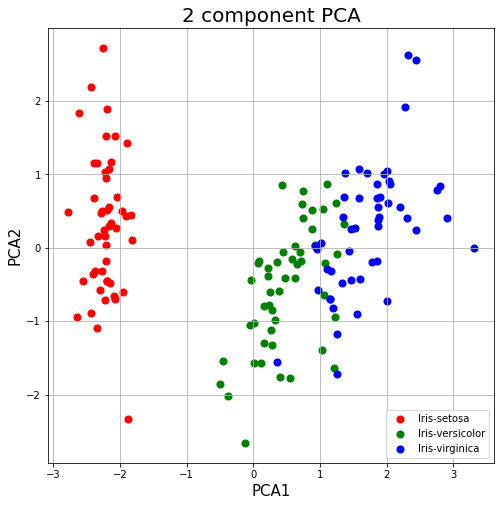

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Caso Aplicado

##Seleção de Subconjunto de Atributos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importanto Base

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_data = pd.read_csv('/content/drive/MyDrive/Data/Hitters.csv').dropna()

#removendo colunas desnecessárias
df_data.drop(['Unnamed: 0','League','Division','NewLeague'], axis=1, inplace=True)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    int64  
 1   Hits     263 non-null    int64  
 2   HmRun    263 non-null    int64  
 3   Runs     263 non-null    int64  
 4   RBI      263 non-null    int64  
 5   Walks    263 non-null    int64  
 6   Years    263 non-null    int64  
 7   CAtBat   263 non-null    int64  
 8   CHits    263 non-null    int64  
 9   CHmRun   263 non-null    int64  
 10  CRuns    263 non-null    int64  
 11  CRBI     263 non-null    int64  
 12  CWalks   263 non-null    int64  
 13  PutOuts  263 non-null    int64  
 14  Assists  263 non-null    int64  
 15  Errors   263 non-null    int64  
 16  Salary   263 non-null    float64
dtypes: float64(1), int64(16)
memory usage: 37.0 KB


Apresentando os dados

In [10]:
df_data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


Estatísticas Resumo

In [11]:
df_data.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


Vamos criar duas subamostras contendo 70% das observações para Treino e 30% das observações para teste.

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_data,test_size=0.3, random_state=24)

X_train = df_train[df_data.columns.drop('Salary')].values.reshape(-1,np.size(df_data.columns.drop('Salary')))
X_test = df_test[df_data.columns.drop('Salary')].values.reshape(-1,np.size(df_data.columns.drop('Salary')))
y_train = df_train['Salary'].values.reshape(-1,1)
y_test = df_test['Salary'].values.reshape(-1,1)

Carregamos o pacote de regressão linear do Sci Kit Learn. Ele entrega os mesmos resultados do Stats Models, porém é focado em predição e não explicação dos dados passados.

In [13]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

Os coeficientes estimados pelo método linear para cada feature.

In [14]:
modelo.intercept_

array([-48.26165084])

In [15]:
modelo.coef_

array([[-1.17837682,  6.92692698,  2.98683949, -4.57927843, -0.98379433,
         5.73794904, -7.67986131,  0.18417133, -1.21486958, -0.06310659,
         1.5489898 ,  0.90249273, -0.64776496,  0.3528485 ,  0.22901505,
        -3.01991267]])

In [16]:
pd.Series(modelo.coef_.flatten(), index=df_train.columns[0:16])

AtBat     -1.178377
Hits       6.926927
HmRun      2.986839
Runs      -4.579278
RBI       -0.983794
Walks      5.737949
Years     -7.679861
CAtBat     0.184171
CHits     -1.214870
CHmRun    -0.063107
CRuns      1.548990
CRBI       0.902493
CWalks    -0.647765
PutOuts    0.352848
Assists    0.229015
Errors    -3.019913
dtype: float64

Predições para os dados de treino e teste.

In [17]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

MSE para as projeções de treino e teste.

In [18]:
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)

MSE_modelo = [MSE_train, MSE_test]

MSE_modelo

[63130.81810670703, 209670.27729672723]

### Backward Stepwise

In [19]:
from sklearn.feature_selection import RFE

X = X_train
y = y_train
names=pd.DataFrame(df_train.drop('Salary',axis=1).columns)

#estima o modelo linear
lin_reg = LinearRegression()

#modelo backwards
rfe_mod = RFE(lin_reg, step=1, verbose=2) 
myvalues=rfe_mod.fit(X,y) #to fit

rankings=pd.DataFrame(myvalues.ranking_) 


ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


,Feature,Rank
0,AtBat,1
1,Hits,1
2,HmRun,1
3,Runs,1
4,RBI,1
5,Walks,1
6,Years,7
7,CAtBat,8
8,CHits,2
9,CHmRun,9


Predições para os dados de treino e teste.

In [20]:
y_train_pred = rfe_mod.predict(X_train)
y_test_pred = rfe_mod.predict(X_test)

MSE para as projeções de treino e teste.

In [21]:
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)

MSE_modelo = [MSE_train, MSE_test]

MSE_modelo

[71788.84023619496, 211159.32116339827]

## Árvores de Decisão para Seleção de Atributos

Importanto bibliotecas de árvores

In [22]:
import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from graphviz import Source

Estimando uma árvore limitada a 10 nós terminais (folhas).

In [23]:
modelo = DecisionTreeRegressor(max_leaf_nodes=10, random_state=123)
modelo.fit(X_train, y_train)

print('Profundidade da árvore:', modelo.get_depth())
print('Número de folhas:', modelo.get_n_leaves() )

Profundidade da árvore: 5
Número de folhas: 10


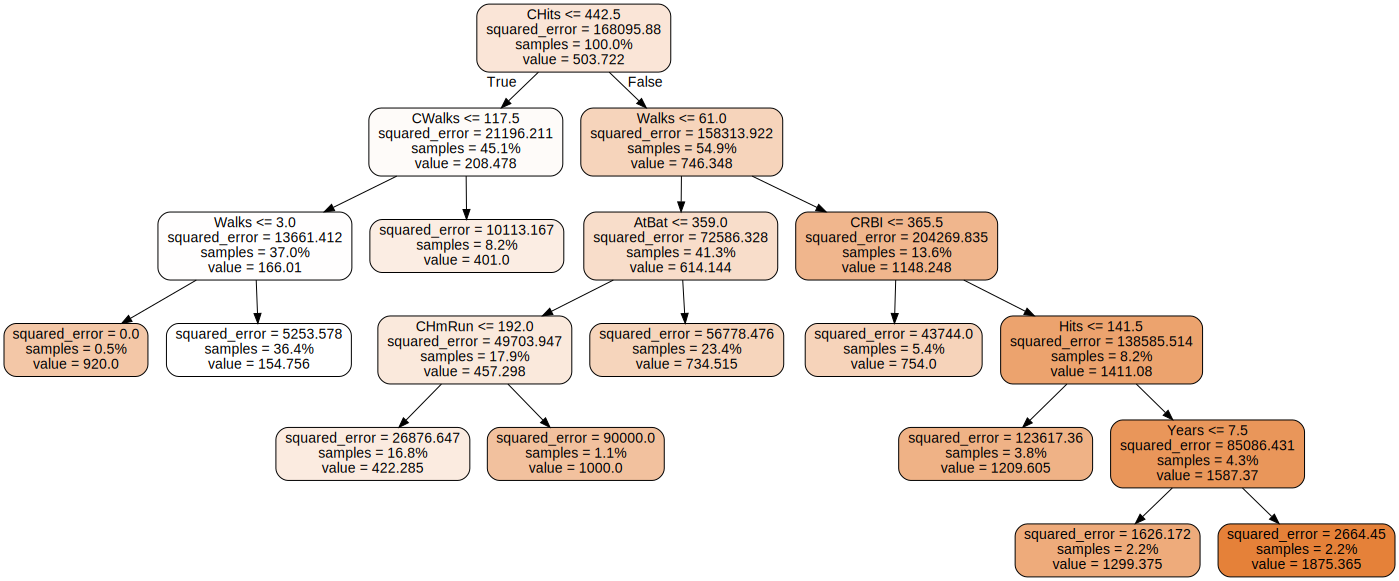

In [24]:
features = df_data.columns.drop('Salary')

dot_data = export_graphviz(modelo, out_file=None,
                                filled=True, rounded=True,
                                feature_names=features,
                                proportion=True) 

graph = Source(dot_data)
graph

In [25]:
for i,v in enumerate(modelo.feature_importances_):
 print(features[i] + "Score: {}".format(v))


AtBatScore: 0.05593680249731653
HitsScore: 0.020769632306776562
HmRunScore: 0.0
RunsScore: 0.0
RBIScore: 0.0
WalksScore: 0.23169847281142564
YearsScore: 0.025867183493957342
CAtBatScore: 0.0
CHitsScore: 0.5138378597383134
CHmRunScore: 0.024445242337204943
CRunsScore: 0.0
CRBIScore: 0.10098962140045767
CWalksScore: 0.02645518541454794
PutOutsScore: 0.0
AssistsScore: 0.0
ErrorsScore: 0.0


## Amostragem

Amostragem é uma abordagem comumente utilizada para facilitar: (1) redução dos dados para análise exploratória e escalar algoritmos para BIG DATA e (2) quantificar incertezas devido variações da distribuição dos dados.

In [26]:
df_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


Vamos amostrar 3 itens do dataset de células de forma aleatória e sem reposição.

In [27]:
sample = df_data.sample(n=3, random_state=123)
sample

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
37,268,60,5,24,25,15,2,350,78,5,34,29,18,442,59,6,90.0
95,382,119,13,54,58,36,12,2133,594,41,287,294,227,59,156,9,595.0
312,387,124,1,67,27,36,7,1775,506,6,272,125,194,186,290,17,550.0


Agora vamos amostrar 1% do dataset de forma aleatória e sem reposição.

In [28]:
sample = df_data.sample(frac=0.01, random_state=123)
sample

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
37,268,60,5,24,25,15,2,350,78,5,34,29,18,442,59,6,90.0
95,382,119,13,54,58,36,12,2133,594,41,287,294,227,59,156,9,595.0
312,387,124,1,67,27,36,7,1775,506,6,272,125,194,186,290,17,550.0


Agora vamos selecionar 1% do dataset de forma aleatória e com reposição.

In [29]:
sample = df_data.sample(frac=0.01, replace=True, random_state=123)
sample

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
129,570,169,21,72,88,38,7,3754,1077,140,492,589,263,295,15,5,950.0
284,562,169,17,88,73,53,8,3181,841,61,450,342,373,351,442,17,530.0
20,413,92,16,72,48,65,1,413,92,16,72,48,65,280,9,5,100.0


## Normalizando Atributos - Z-Score

Importando pacote de normalização scikit.

In [30]:
from sklearn.preprocessing import StandardScaler

Normalizamos os atributos X.

In [31]:
scaler = StandardScaler()

X_train_scaled_zscore = scaler.fit(X_train).transform(X_train)
X_test_scaled_zscore = scaler.fit(X_train).transform(X_test)

In [32]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,283,77,14,45,47,26,16,6840,1910,259,915,1067,546,144,6,5
1,600,139,0,94,29,60,2,1236,309,1,201,69,110,300,12,9
2,530,159,3,82,50,47,6,1619,426,11,218,149,163,196,354,15
3,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7
4,445,99,1,46,24,29,4,618,129,1,72,31,48,278,415,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,312,68,2,32,22,24,1,312,68,2,32,22,24,86,150,15
180,616,163,27,83,107,32,3,1437,377,65,181,227,82,110,308,15
181,591,157,16,90,78,26,4,2020,541,52,310,226,91,290,440,25
182,503,136,5,62,48,83,10,3423,970,20,408,303,414,65,258,8


In [33]:
pd.DataFrame(X_train_scaled_zscore)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.781862,-0.650046,0.403021,-0.318851,-0.063400,-0.637133,1.872596,1.957351,1.941448,2.856387,1.801675,2.614014,1.265522,-0.518231,-0.797938,-0.546610
1,1.425196,0.796078,-1.304517,1.699940,-0.816026,0.955954,-1.090431,-0.592044,-0.602519,-0.860369,-0.443877,-0.803472,-0.543327,0.075333,-0.757415,0.045015
2,0.937833,1.262570,-0.938616,1.205543,0.062037,0.346832,-0.243852,-0.417808,-0.416608,-0.716309,-0.390411,-0.529525,-0.323444,-0.320376,1.552380,0.932452
3,-1.464170,-1.583029,-1.182550,-1.225247,-1.694088,-0.871410,-1.090431,-1.056977,-1.026779,-0.860369,-0.981677,-1.008932,-0.900118,-0.776963,0.019270,-0.250797
4,0.346035,-0.136905,-1.182550,-0.277651,-1.025088,-0.496566,-0.667141,-0.873188,-0.888537,-0.860369,-0.849585,-0.933596,-0.800548,-0.008375,1.964361,1.080358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.579954,-0.859967,-1.060583,-0.854448,-1.108713,-0.730844,-1.302075,-1.012394,-0.985465,-0.845963,-0.975387,-0.964415,-0.900118,-0.738914,0.174607,0.932452
180,1.536593,1.355868,1.988593,1.246742,2.445350,-0.356000,-0.878786,-0.500605,-0.494468,0.061617,-0.506777,-0.262427,-0.659491,-0.647597,1.241706,0.932452
181,1.362535,1.215921,0.646955,1.535141,1.232787,-0.637133,-0.667141,-0.235384,-0.233875,-0.125661,-0.101068,-0.265851,-0.622153,0.037284,2.133206,2.411513
182,0.749850,0.726104,-0.694682,0.381546,-0.021588,2.033630,0.602727,0.402875,0.447801,-0.586654,0.207145,-0.002177,0.717889,-0.818817,0.904017,-0.102891


## Normalizando Atributos - MinMax

Importando pacote de normalização scikit.

In [34]:
from sklearn.preprocessing import MinMaxScaler

Normalizamos os atributos X.

In [35]:
scaler = MinMaxScaler()

X_train_scaled_minmax = scaler.fit(X_train).transform(X_train)
X_test_scaled_minmax = scaler.fit(X_train).transform(X_test)

In [36]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,283,77,14,45,47,26,16,6840,1910,259,915,1067,546,144,6,5
1,600,139,0,94,29,60,2,1236,309,1,201,69,110,300,12,9
2,530,159,3,82,50,47,6,1619,426,11,218,149,163,196,354,15
3,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7
4,445,99,1,46,24,29,4,618,129,1,72,31,48,278,415,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,312,68,2,32,22,24,1,312,68,2,32,22,24,86,150,15
180,616,163,27,83,107,32,3,1437,377,65,181,227,82,110,308,15
181,591,157,16,90,78,26,4,2020,541,52,310,226,91,290,440,25
182,503,136,5,62,48,83,10,3423,970,20,408,303,414,65,258,8


In [37]:
pd.DataFrame(X_train_scaled_minmax)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.423756,0.352657,0.350,0.409524,0.419048,0.260417,0.652174,0.486034,0.448260,0.822222,0.422099,0.811594,0.348243,0.109091,0.012195,0.15625
1,0.932584,0.652174,0.000,0.876190,0.247619,0.614583,0.043478,0.086718,0.071731,0.003175,0.092002,0.050343,0.069649,0.227273,0.024390,0.28125
2,0.820225,0.748792,0.075,0.761905,0.447619,0.479167,0.217391,0.114009,0.099247,0.034921,0.099861,0.111365,0.103514,0.148485,0.719512,0.46875
3,0.266453,0.159420,0.025,0.200000,0.047619,0.208333,0.043478,0.013895,0.008937,0.003175,0.012945,0.004577,0.014696,0.057576,0.258130,0.21875
4,0.683788,0.458937,0.025,0.419048,0.200000,0.291667,0.130435,0.042682,0.029398,0.003175,0.032362,0.021358,0.030032,0.210606,0.843496,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.470305,0.309179,0.050,0.285714,0.180952,0.239583,0.000000,0.020878,0.015052,0.006349,0.013870,0.014493,0.014696,0.065152,0.304878,0.46875
180,0.958266,0.768116,0.675,0.771429,0.990476,0.322917,0.086957,0.101040,0.087723,0.206349,0.082755,0.170862,0.051757,0.083333,0.626016,0.46875
181,0.918138,0.739130,0.400,0.838095,0.714286,0.260417,0.130435,0.142582,0.126294,0.165079,0.142395,0.170099,0.057508,0.219697,0.894309,0.78125
182,0.776886,0.637681,0.125,0.571429,0.428571,0.854167,0.391304,0.242554,0.227187,0.063492,0.187702,0.228833,0.263898,0.049242,0.524390,0.25000


## Discretização

Discretização é a etapa de pré-processamento de dados que é muito utilizada para transformar valores contínuos em atributos.

Primeiramente, nos plotamos um histogram que mostra a distribuição dos atributos.

In [38]:
#bins = df_data['CHits'].hist(bins=10)

count, division = np.histogram(df_data['CHits'])

for i in np.arange(0,np.size(division)-1):
  print("Intevalo: ({:.2f},{:.2f}], count: {}".format(division[i],division[i+1], count[i]))

Intevalo: (4.00,429.20], count: 115
Intevalo: (429.20,854.40], count: 61
Intevalo: (854.40,1279.60], count: 37
Intevalo: (1279.60,1704.80], count: 25
Intevalo: (1704.80,2130.00], count: 15
Intevalo: (2130.00,2555.20], count: 8
Intevalo: (2555.20,2980.40], count: 1
Intevalo: (2980.40,3405.60], count: 0
Intevalo: (3405.60,3830.80], count: 0
Intevalo: (3830.80,4256.00], count: 1


Agora vamos agrupar os dados contínuos em 4 intervalos de mesma largura.

In [39]:
bins = pd.cut(df_data['CHits'],4)
bins.value_counts(sort=False)

(-0.252, 1067.0]    199
(1067.0, 2130.0]     54
(2130.0, 3193.0]      9
(3193.0, 4256.0]      1
Name: CHits, dtype: int64

Caso queiramos criar quatro intervalos com aproximadamente o mesmo número de instâncias devemos utilizar o método qcut().

In [40]:
bins = pd.qcut(df_data['CHits'],4)
bins.value_counts(sort=False)

(3.999, 212.0]      66
(212.0, 516.0]      66
(516.0, 1054.0]     65
(1054.0, 4256.0]    66
Name: CHits, dtype: int64